In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
import tensorflow as tf
from ultrayolo import YoloV3, datasets
from ultrayolo.helpers import draw
from pathlib import Path
import numpy as np
import logging

from matplotlib import patches
import matplotlib.pyplot as plt

# Predict using a custom Model

The classes contained in the dataset

In [3]:
classes_dict = datasets.load_classes('./custom_classes.txt', True)
target_shape = (512, 512, 3)
max_objects = 50
num_classes = len(classes_dict)
print(f'number of classes {num_classes}')
classes_dict

number of classes 5


{0: 'book',
 1: 'bus',
 2: 'car',
 3: 'motorcycle',
 4: 'vehicle registration plate'}

In [18]:
model_obj = YoloV3(target_shape, max_objects,
               num_classes=num_classes, score_threshold=0.7, iou_threshold=0.7, 
               training=False, backbone='ResNet101V2')

In [19]:
model_obj.summary()

Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
ResNet101V2 (Model)             [(None, 64, 64, 512) 42626560    input_51[0][0]                   
__________________________________________________________________________________________________
yolo_head_0 (Model)             (None, 16, 16, 512)  11548672    ResNet101V2[1][2]                
__________________________________________________________________________________________________
yolo_head_1 (Model)             (None, 32, 32, 256)  3088384     yolo_head_0[1][0]                
                                                                 ResNet101V2[1][1]           

In [22]:
model = tf.keras.models.load_model(w_path, compile=False)

In [23]:
model.summary()

Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
ResNet101V2 (Model)             [(None, 64, 64, 512) 42626560    input_1[0][0]                    
__________________________________________________________________________________________________
yolo_head_0 (Model)             (None, 16, 16, 512)  11548672    ResNet101V2[1][2]                
__________________________________________________________________________________________________
yolo_head_1 (Model)             (None, 32, 32, 256)  3088384     yolo_head_0[1][0]                
                                                                 ResNet101V2[1][1]           

## Load the weights

load a custom model from [here](add a valid link here)

In [ ]:
# w_path = Path('./weights.117-9.932.h5')
w_path = Path('./weights.h5')
model.load_weights(w_path)

## Predict

we predict the objects using an image from the web. You can try with your.

### Download an image

In [25]:
img = datasets.open_image('https://c8.staticflickr.com/4/3901/14855908765_8bdda9130b_z.jpg')
img_pad = datasets.pad_to_fixed_size(img, target_shape)
img_resized = datasets.resize(img, target_shape)
#preprocess the image
x = np.divide(img_pad, 255.)
x = np.expand_dims(x, 0)
x.shape

(1, 512, 512, 3)

### Perform the prediction

In [32]:
boxes, scores, classes, sel = model.predict(x)
print(f'found {sel[0]} objects')

found 4 objects


Uncomment the cells below to see what the model returns

### Show the image with the discovered objects

car 0.9765529
car 0.9688577
car 0.7248832
car 0.6261136


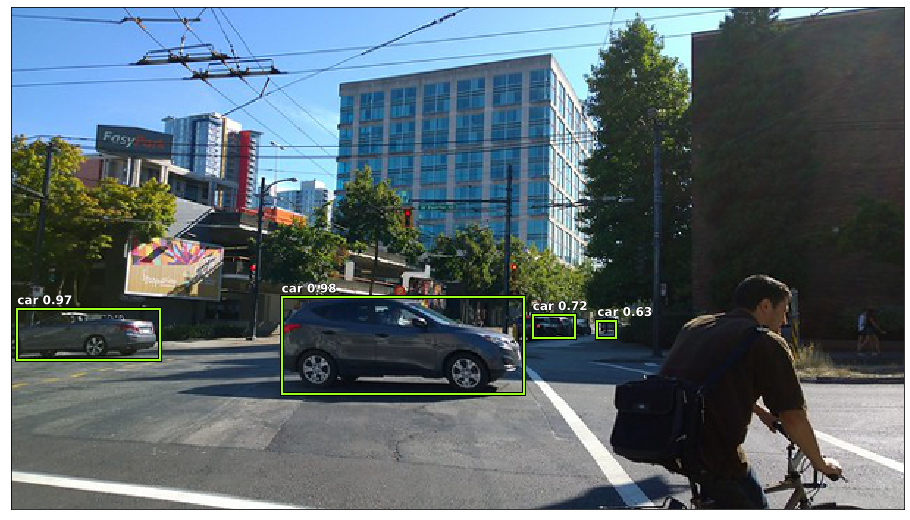

In [33]:
ax = draw.show_img(img_resized, figsize=(16,10))
for i,b in enumerate(boxes[0,:sel[0]]):
    draw.rect(ax, b, color='#9cff1d')
    name_score = f'{classes_dict[classes[0, i]]} {str(round(scores[0,i],2))}'
    draw.text(ax, b[:2], name_score, sz=12)
    print(classes_dict[classes[0, i]], scores[0,i])
    
plt.show()